### Database manifestação

#### Pré processamento
Lidando com nomes próprios

In [11]:
import spacy
import nltk

nltk.download('stopwords')

nlp = spacy.load('pt_core_news_lg')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

# Mantem entidades, nomes próprios e de locais
def pre_processamento_ent(texto):
    doc = nlp(texto)  # mantém caixa original

    tokens = []
    ent_by_start = {ent.start: ent for ent in doc.ents}

    i = 0
    while i < len(doc):
        if i in ent_by_start:
            ent = ent_by_start[i]
            ent_text = ent.text
            if ent_text.lower() not in stopwords:  # compara versão minúscula
                tokens.append(ent_text)
            i = ent.end
        else:
            token = doc[i]
            if token.is_alpha and token.text.lower() not in stopwords:
                tokens.append(token.text)
            i += 1

    return tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re

nltk.download('stopwords')

def pre_processamento(texto):
  palavras = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

  stopwords = nltk.corpus.stopwords.words('portuguese')
  sw = set(stopwords)

  palavras_filtradas = [i for i in palavras if i not in sw] # remove stopwords

#  return " ".join(palavras_filtradas)
  return palavras_filtradas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lidando com datas e termos como "20 mil pessoas"

In [27]:
import spacy
import nltk
from spacy.matcher import Matcher
from spacy.util import filter_spans

nltk.download('stopwords')

# Carrega modelo e stopwords
nlp = spacy.load('pt_core_news_lg')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

# Matcher para padrões como "20 mil pessoas" e datas
matcher = Matcher(nlp.vocab)
padrao_cardinal_substantivo = [
    {"LIKE_NUM": True},
    {"LOWER": {"IN": ["mil", "milhão", "milhões", "bilhão", "bilhões"]}, "OP": "?"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
padrao_num_extenso = [
    {"POS": "NUM"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
padrao_ordinal = [
    {"TAG": "ORD"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
matcher.add("NUM_UNIDADE", [padrao_cardinal_substantivo, padrao_num_extenso, padrao_ordinal])

def pre_processamento_ent_numeros(texto):
    doc = nlp(texto)

    # Identifica spans compostos (ex: "vinte mil pessoas")
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    spans_filtrados = filter_spans(spans)

    # Mapeia início do span -> span para evitar tokenização duplicada
    spans_dict = {span.start: span for span in spans_filtrados}
    ent_by_start = {ent.start: ent for ent in doc.ents}

    tokens = []
    i = 0
    while i < len(doc):
        if i in spans_dict:
            span = spans_dict[i]
            span_text = span.text
            if span_text.lower() not in stopwords:
                tokens.append(span_text)
            i = span.end
        elif i in ent_by_start:
            ent = ent_by_start[i]
            ent_text = ent.text
            if ent_text.lower() not in stopwords:
                tokens.append(ent_text)
            i = ent.end
        else:
            token = doc[i]
            if token.is_alpha and token.text.lower() not in stopwords:
                tokens.append(token.text)
            i += 1

        tokens_unicos = list(dict.fromkeys(tokens))
    return tokens_unicos


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Análise por notícia

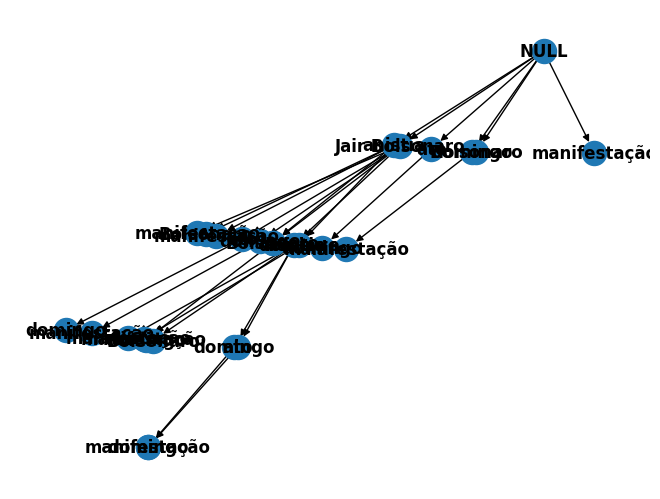

In [ ]:
from trieofrules import trieofrules
import csv
import re

valores_coluna = []

with open('datasets/database_manifestacao_bolsonaro_pro_anistia.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for line in reader:
      texto = line['Texto']
      paragrafos = texto.split('\n')  
      paragrafos = [p.strip() for p in paragrafos if p.strip()]
      valores_coluna.extend(paragrafos) #por paragrafo
      #valores_coluna.append(line['Texto']) #noticia inteira
      
valores = []
for texto in valores_coluna:
      result = pre_processamento_ent_numeros(texto)
      valores.append(result)

#supported algorithms: FP-max, FP-growth, Apriori
TOR_manifest = trieofrules(data = valores, alg='Apriori', min_support=0.78) 
TOR_manifest.draw()
TOR_manifest.save_graph(filename = 'outputs/manifest_noticias.graphml') 

In [30]:
from nltk.text import Text
from nltk import word_tokenize


txt = " ".join(valores_coluna).lower()

#tokens = pre_processamento_ent(txt) #resultado fica sem stopwords
#token = tokens = word_tokenize(txt, language='english')
tokens = txt.split()
txt_manifest = Text(tokens)

palavra_mais_usada = next(iter(TOR_manifest.frequent_items)).lower() 
txt_manifest.concordance('bolsonaro')


Displaying 25 of 72 matches:
    o ato com o ex-presidente jair bolsonaro (pl) na avenida paulista neste dom
o de janeiro, também convocada por bolsonaro e aliados, reuniu cerca de 18,3 mi
ocracia. por volta das 15h40, jair bolsonaro discursou e pediu anistia para os 
sse que "eleições em 2026 sem jair bolsonaro é negar a democracia, é escancarar
 superior eleitoral (tse) condenou bolsonaro à inelegibilidade até 2030 por abu
midade tornar réus o ex-presidente bolsonaro e mais sete aliados por tentativa 
os. o ato com o ex-presidente jair bolsonaro (pl) e diversos aliados na avenida
tribunal superior eleitoral (tse), bolsonaro disse que “eleições em 26 sem jair
disse que “eleições em 26 sem jair bolsonaro é negar a democracia, é escancarar
ença de público, o comício de jair bolsonaro na avenida paulista pode ser class
overnadores de oposição ao lado de bolsonaro mostra o potencial de uma possível
te domingo pelo ex-presidente jair bolsonaro (pl) e o pastor silas malafaia na 
4, quando 1

In [36]:
import re

def concordance_termo(texto, termo, largura=40, case_sensitive=False):
    if not case_sensitive:
        texto_proc = texto.lower()
        termo_proc = termo.lower()
    else:
        texto_proc = texto
        termo_proc = termo

    ocorrencias = [m.start() for m in re.finditer(re.escape(termo_proc), texto_proc)]
    resultados = []

    for i in ocorrencias:
        inicio = max(0, i - largura)
        fim = min(len(texto), i + len(termo) + largura)

        esquerda = texto[inicio:i].replace('\n', ' ')
        centro = texto[i:i+len(termo)]
        direita = texto[i+len(termo):fim].replace('\n', ' ')

        # Calcula quantos espaços são necessários para alinhar o termo na coluna `largura`
        padding = largura - len(esquerda)
        padding = max(0, padding)

        linha = f"{' ' * padding}{esquerda}{centro}{direita}"
        resultados.append(linha)

    return resultados


In [40]:
txt = " ".join(valores_coluna).lower()

#resultados = concordance_termo(txt, "jair bolsonaro", largura=40)
resultados = concordance_termo(txt, "8 de janeiro", largura=40)

print(len(resultados))
for r in resultados:
    print(r)


29
a anistia aos envolvidos nos ataques de 8 de janeiro reuniu cerca de 44,9 mil manifestantes,
à anistia aos envolvidos nos ataques de 8 de janeiro de 2022, enquanto 34% defendem que o gr
 da anistia para envolvidos nos atos do 8 de janeiro, o monitoramento da usp contabilizou 18
ação é pela anistia dos condenados pelo 8 de janeiro, projeto de lei na câmara defendido por
 pelo pedido de anistia condenados pelo 8 de janeiro  45,7 mil em 7/09 de 2024 - protesto de
a invasão às sedes dos três poderes, em 8 de janeiro de 2023.  a estimativa é do monitor do 
 à paulista pedir anistia aos presos do 8 de janeiro, o ex-presidente reuniu cerca de 185 mi
 disseram preferir que os envolvidos no 8 de janeiro continuem presos, contra 34% que defend
a anistia aos condenados nos ataques de 8 de janeiro em brasília, o maior ataque às institui
 se não fosse isso, teria sido preso em 8 de janeiro "e estaria apodrecendo até hoje ou até 
à anistia aos envolvidos nos ataques de 8 de janeiro de 2022, enqua